This is my code for the Innomatics Data Science Internship 
I have written the web scrapping code in colab and uploaded the same

In [ ]:
#shape of "movies.csv
import pandas as pd
file_path = 'movies.csv'
df = pd.read_csv(file_path)
data_shape = df.shape
print(f"CSV file has {data_shape[0]} rows and {data_shape[1]} columns.")


In [4]:
#shape of "ratings.csv"
file_path = 'ratings.csv'
df = pd.read_csv(file_path)
data_shape = df.shape
print(f"CSV file has {data_shape[0]} rows and {data_shape[1]} columns.")

CSV file has 100836 rows and 4 columns.


In [5]:
#How many unique "userId" are available in "ratings.csv"?
ratings_file_path = 'ratings.csv'
ratings_df = pd.read_csv(ratings_file_path)
unique_user_ids = ratings_df['userId'].nunique()
print(f"There are {unique_user_ids} unique userId values in the 'ratings.csv' file.")


There are 610 unique userId values in the 'ratings.csv' file.


In [6]:
#Which movie has recieved maximum number of user ratings?
ratings = pd.read_csv('ratings.csv')
# Group by movieId and count the number of ratings
movie_ratings_count = ratings.groupby('movieId')['rating'].count()
#movieId with the maximum number of ratings
max_ratings_movie_id = movie_ratings_count.idxmax()
#movie title corresponding to the movieId
movies = pd.read_csv('movies.csv')
max_ratings_movie_title = movies[movies['movieId'] == max_ratings_movie_id]['title'].values[0]
print(f"The movie with the maximum number of user ratings is '{max_ratings_movie_title}' with {movie_ratings_count[max_ratings_movie_id]} ratings.")


The movie with the maximum number of user ratings is 'Forrest Gump (1994)' with 329 ratings.


In [7]:
#Select all the correct tags submitted by users to "Matrix, The (1999)" movie?
tags = pd.read_csv('tags.csv')
movies = pd.read_csv('movies.csv')
matrix_movie_id = movies[movies['title'] == 'Matrix, The (1999)']['movieId'].values[0]
# Filter tags for the specific movieId
matrix_tags = tags[tags['movieId'] == matrix_movie_id]
# Display the tags for "Matrix, The (1999)"
print(f"Tags for 'Matrix, The (1999)':")
print(matrix_tags['tag'].values)

# from the given only karate is not present

Tags for 'Matrix, The (1999)':
['martial arts' 'sci-fi' 'alternate universe' 'philosophy'
 'post apocalyptic']


In [8]:
#What is the average user rating for movie named "Terminator 2: Judgment Day (1991)"?
ratings = pd.read_csv('ratings.csv')
# Load the movies dataset to get the movieId for "Terminator 2: Judgment Day (1991)"
movies = pd.read_csv('movies.csv')
terminator2_movie_id = movies[movies['title'] == 'Terminator 2: Judgment Day (1991)']['movieId'].values[0]
# Filter ratings for the specific movieId
terminator2_ratings = ratings[ratings['movieId'] == terminator2_movie_id]
# Calculate the average rating
average_rating = terminator2_ratings['rating'].mean()
print(f"The average user rating for 'Terminator 2: Judgment Day (1991)' is {average_rating:.2f}.")


The average user rating for 'Terminator 2: Judgment Day (1991)' is 3.97.


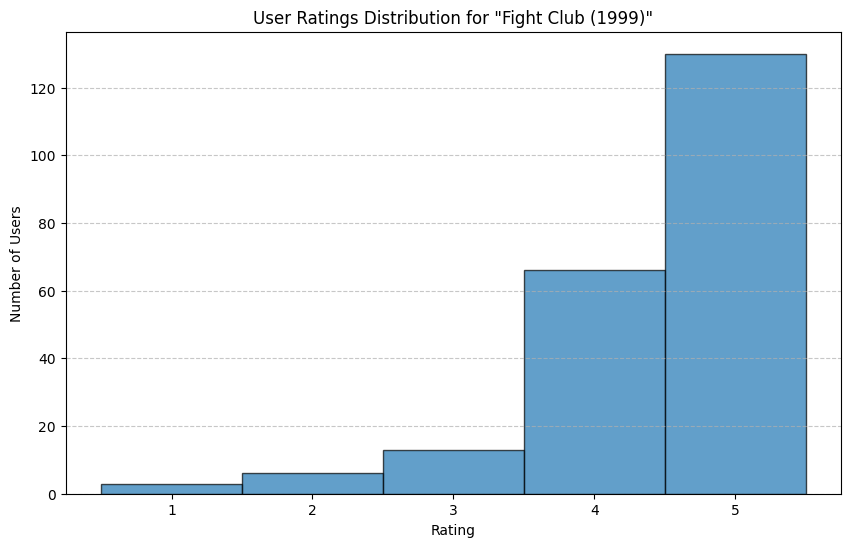

In [10]:
import matplotlib.pyplot as plt
ratings = pd.read_csv('ratings.csv')
# Load the movies dataset to get the movieId for "Fight Club (1999)"
movies = pd.read_csv('movies.csv')
fight_club_movie_id = movies[movies['title'] == 'Fight Club (1999)']['movieId'].values[0]
# Filter ratings for the fight club
fight_club_ratings = ratings[ratings['movieId'] == fight_club_movie_id]
plt.figure(figsize=(10, 6))
plt.hist(fight_club_ratings['rating'], bins=[0.5, 1.5, 2.5, 3.5, 4.5, 5.5], edgecolor='black', alpha=0.7)
plt.title('User Ratings Distribution for "Fight Club (1999)"')
plt.xlabel('Rating')
plt.ylabel('Number of Users')
plt.xticks([1, 2, 3, 4, 5])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
# from the above plot it is evident that it has left skewed distribution

In [11]:
ratings = pd.read_csv('ratings.csv')
grouped_ratings = ratings.groupby('movieId').agg({'rating': ['count', 'mean']})
grouped_ratings = grouped_ratings.reset_index()
# Load the movies dataset
movies = pd.read_csv('movies.csv')
# Perform inner join on the movies and grouped_ratings dataframes
merged_data = pd.merge(movies, grouped_ratings, on='movieId', how='inner')
merged_data.columns = ['movieId', 'title', 'genres', 'rating_count', 'avg_rating']
# Filter only those movies with more than 50 user ratings
filtered_data = merged_data[merged_data['rating_count'] > 50]
print(filtered_data.head())

<ipython-input-11-0aaa9c3f8a42>:7: FutureWarning: merging between different levels is deprecated and will be removed in a future version. (1 levels on the left, 2 on the right)
  merged_data = pd.merge(movies, grouped_ratings, on='movieId', how='inner')
<ipython-input-11-0aaa9c3f8a42>:7: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  merged_data = pd.merge(movies, grouped_ratings, on='movieId', how='inner')


   movieId                    title  \
0        1         Toy Story (1995)   
1        2           Jumanji (1995)   
2        3  Grumpier Old Men (1995)   
5        6              Heat (1995)   
6        7           Sabrina (1995)   

                                        genres  rating_count  avg_rating  
0  Adventure|Animation|Children|Comedy|Fantasy           215    3.920930  
1                   Adventure|Children|Fantasy           110    3.431818  
2                               Comedy|Romance            52    3.259615  
5                        Action|Crime|Thriller           102    3.946078  
6                               Comedy|Romance            54    3.185185  


In [12]:
#Which movie is the most popular based on  average user ratings?

#Answer this question only after applying the above mentioned "Mandatory Operration".
# Sort the filtered_data by average rating in descending order
most_popular_movie = filtered_data.sort_values(by='avg_rating', ascending=False).head(1)

# Display the most popular movie
print("The most popular movie based on average user ratings is:")
print(most_popular_movie[['title', 'avg_rating']])

The most popular movie based on average user ratings is:
                                title  avg_rating
277  Shawshank Redemption, The (1994)    4.429022


In [13]:
#Select all the correct options which comes under top 5 popular movies based on number of user ratings.

# Sort the filtered_data by rating count in descending order
top5_popular_movies = filtered_data.sort_values(by='rating_count', ascending=False).head(5)

# Display the top 5 popular movies
print("Top 5 popular movies based on number of user ratings are:")
print(top5_popular_movies[['title', 'rating_count']])


Top 5 popular movies based on number of user ratings are:
                                 title  rating_count
314                Forrest Gump (1994)           329
277   Shawshank Redemption, The (1994)           317
257                Pulp Fiction (1994)           307
510   Silence of the Lambs, The (1991)           279
1938                Matrix, The (1999)           278


#bad boys is not in the list

In [14]:
#Which Sci-Fi movie is "third most popular" based on the number of user ratings?

# Filter Sci-Fi movies from the filtered_data
sci_fi_movies = filtered_data[filtered_data['genres'].str.contains('Sci-Fi')]

# Sort Sci-Fi movies by rating count in descending order
top_sci_fi_movies = sci_fi_movies.sort_values(by='rating_count', ascending=False)

# Select the third row (index 2, since indexing starts from 0)
third_most_popular_sci_fi_movie = top_sci_fi_movies.iloc[2]

# Display the third most popular Sci-Fi movie
print("The third most popular Sci-Fi movie based on number of user ratings is:")
print(third_most_popular_sci_fi_movie[['title', 'rating_count']])

The third most popular Sci-Fi movie based on number of user ratings is:
title           Jurassic Park (1993)
rating_count                     238
Name: 418, dtype: object


In [ ]:
#To find the movieId of the movie which has the highest IMDB rating.
# I took out the filtered data and checked in the first movie in the imdb top 250 list is present
# Display the list of movies with more than 50 user ratings
filtered_data[['title', 'rating_count']]
shawshank_movie_id = filtered_data[filtered_data['title'] == 'Shawshank Redemption, The (1994)']['movieId'].values[0]
print(f"The movieId for 'Shawshank Redemption, The (1994)' is {shawshank_movie_id}.")
# which was Shawshank Redemption, The (1994) with Id 318


In [29]:
#Mention the movieId of the "Sci-Fi" movie which has the highest IMDB rating.
#In order to find this i filtered the movies with more than 50 user ratings and has scifi tag
#Then i checked in IMDB top 250 list
# Filter movies with "Sci-Fi" genre tag from filtered_data
sci_fi_movies = filtered_data[filtered_data['genres'].str.contains('Sci-Fi')]
# Display the list of Sci-Fi movies
sci_fi_movies[['title', 'rating_count']]
inception_movie_id = filtered_data[filtered_data['title'] == 'Inception (2010)']['movieId'].values[0]
print(f"The movieId for 'Inception' is {inception_movie_id}.")
# The Inception movie topped the list with movie id 79132

The movieId for 'Inception' is 79132.
